### Week 11: Ordinary Least Squares

**OBJECTIVES**

- Demonstrate OLS in Python

 - from scratch
 - `statsmodels`
 - `sklearn`

In [1]:
%%latex
$$(X^TX)^{-1}X^Ty$$

<IPython.core.display.Latex object>

In [2]:
from regression import LinearRegression   

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
cali = fetch_california_housing()

In [5]:
print(cali.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [6]:
X, y = cali.data, cali.target

In [7]:
lr = LinearRegression()

In [8]:
import numpy as np

In [9]:
lr.fit(X, y)

In [10]:
lr.coefs_

array([ 5.13515163e-01,  1.56511109e-02, -1.82528269e-01,  8.65099057e-01,
        7.79230657e-06, -4.69928985e-03, -6.39458199e-02, -1.63827177e-02])

In [11]:
lr.intercept_

In [12]:
preds = lr.predict(X)

In [13]:
preds

array([4.09839978, 3.88380622, 3.52943155, ..., 0.6193242 , 0.74355959,
       0.99054306])

In [15]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [16]:
y - y.mean()

array([ 2.45744183,  1.51644183,  1.45244183, ..., -1.14555817,
       -1.22155817, -1.17455817])

In [59]:
class RegressionMetrics:
    import matplotlib.pyplot as plt
    def __init__(self, y_true, y_pred):
        self.y = y_true
        self.y_pred = y_pred
    
    def r_squared(self):
        ssr = np.sum((self.y - self.y_pred)**2)
#         ymean = np.mean(y_true)
        sst = np.sum((self.y - y.mean())**2)
        return 1 - ssr/sst
    
    def mse(self):
        self.mse_ = np.mean((self.y - self.y_pred)**2)
        return self.mse_
        
        
    def rmse(self):
        self.rmse_ = np.sqrt(self.mse_)
        return self.rmse_
        
        
    def plot(self):
        fig, ax = plt.subplots(1, 2, figsize = (15, 6))

        ax[0].plot(self.y - self.y_pred, 'ro', alpha = 0.2, markeredgecolor = 'black')
        ax[0].axhline(color = 'black')

        ax[1].hist(self.y- self.y_pred, bins = 50, color = 'grey', edgecolor = 'black');
        plt.suptitle(f'Evaluation Metrics for OLS fit:\n$r^2$={self.r_squared()}\nMSE:{self.mse()}\nRMSE:{self.rmse()}',
                    verticalalignment = 'bottom', horizontalalignment = 'left', fontsize = 20, x = 0)
        

In [60]:
metric = RegressionMetrics(y, preds)

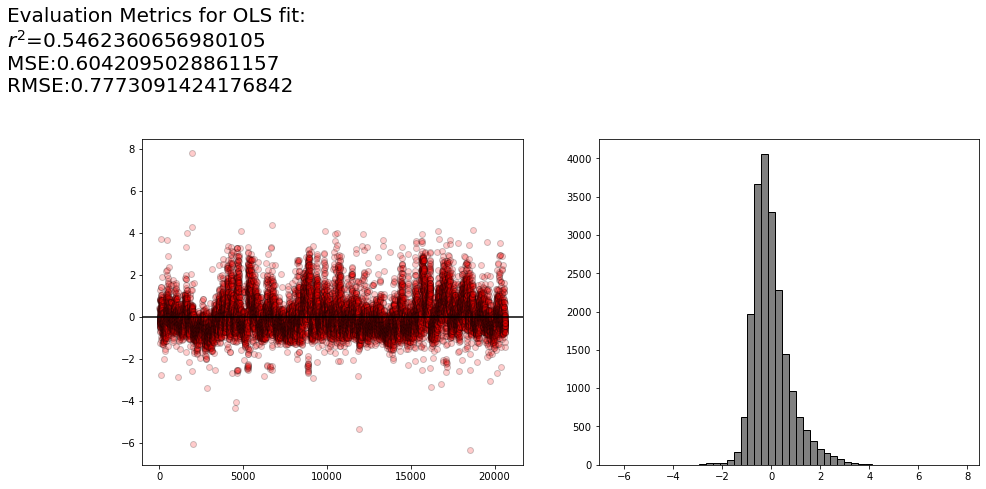

In [61]:
metric.plot()

In [62]:
metric.r_squared()

0.5462360656980105

In [63]:
metric.mse()

0.6042095028861157

In [64]:
metric.rmse()

0.7773091424176842

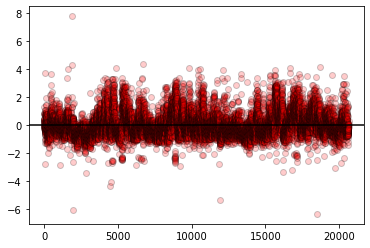

In [36]:
import matplotlib.pyplot as plt
plt.plot(y - preds, 'ro', alpha = 0.2, markeredgecolor = 'black')
plt.axhline(color = 'black')

Text(0.5, 0.98, 'Metrics')

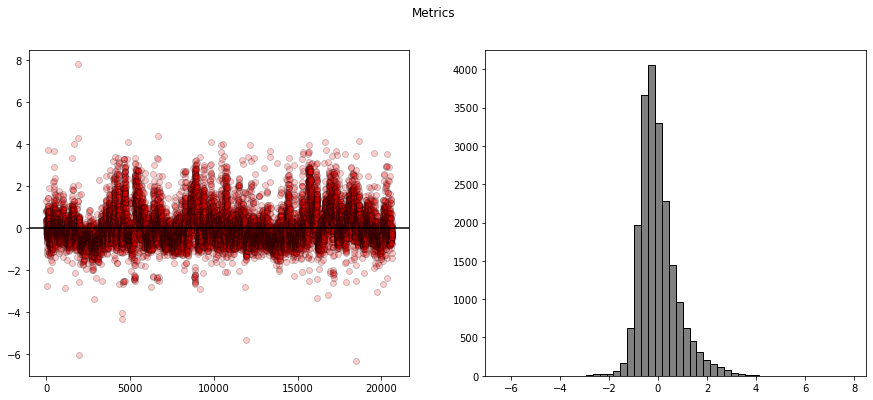

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

ax[0].plot(y - preds, 'ro', alpha = 0.2, markeredgecolor = 'black')
ax[0].axhline(color = 'black')

ax[1].hist(y-preds, bins = 50, color = 'grey', edgecolor = 'black');
plt.suptitle(f'Metrics')

### The Statsmodels Way

In [65]:
import statsmodels.api as sm

In [66]:
model = sm.OLS(y, X).fit()

In [67]:
model

In [69]:
model.summary(xname = cali.feature_names)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          2.137e+04
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                        0.00
Time:                        19:39:55   Log-Likelihood:                         -24087.
No. Observations:               20640   AIC:                                  4.819e+04
Df Residuals:                   20632   BIC:                                  4.825e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5135      0.004    120.594      0.000       0.505       0.522
HouseAge       0.0157      0.000     33.727      0.000       0.015       0.017
AveRooms      -0.1825      0.006    -29.673      0.000      -0.195      -0.170
AveBedrms      0.8651      0.030     28.927      0.000       0.806       0.924
Population  7.792e-06   5.09e-06      1.530      0.126   -2.19e-06    1.78e-05
AveOccup      -0.0047      0.001     -8.987      0.000      -0.006      -0.004
Latitude      -0.0639      0.004    -17.826      0.000      -0.071      -0.057
Longitude     -0.0164      0.001    -14.381      0.000      -0.019      -0.014
==============================================================================
Omnibus:                     4353.392   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.489
Skew:                           1.069   Prob(JB):                         0.00
Kurtosis:                       6.436   Cond. No.                     1.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
model.predict(X)

array([4.09839978, 3.88380622, 3.52943155, ..., 0.6193242 , 0.74355959,
       0.99054306])

### The `scikit-learn` way

- Instantiate --> `lr = LinearRegression()`
- Fit --> `lr.fit(X, y)`
- Score --> `lr.score(X, y)`
- Predict --> `lr.predict(X, y)`

In [71]:
from sklearn.linear_model import LinearRegression

In [73]:
lr = LinearRegression()

In [74]:
lr.fit(X, y)

LinearRegression()

In [75]:
lr.score(X, y)

0.606232685199805

In [89]:
def train_test_split(X, y = None):
    train_idx = np.random.choice(np.arange(len(X)), size = int(.75*len(X)), replace = False)
    X_train = X[train_idx]
    X_test = X[-train_idx]
    if len(y):
        y_train = y[train_idx]
        y_test = y[-train_idx]
    return X_train, X_test, y_train, y_test

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [103]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5990097777462682

In [93]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [111]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
lr2.score(X_train, y_train)
lr2.score(X_test, y_test)

0.6129598213123192